In [1]:
import pandas as pd

In [94]:
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import os

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing

In [6]:
def convert_to_vect(Q,R,S,T):
    resp=np.empty((0,4))
    end:Boolean= False
    idx_q=0    
    idx_r=0
    idx_s=0
    idx_t=0

    
    while not end:
        try:
            q=Q[idx_q]
            r=R[idx_r]
            s=S[idx_s]
            t=T[idx_t]
        except IndexError:
                end=True
                pass    
       
        arr=np.array([q,r,s,t],dtype=int)
        if not (q <= r and  r <=s and s <=t) :#and q < x_complex and t > x_complex :
            arr=np.array([-1,-1,-1,-1],dtype=int)
            print("no")
            
        else:
            resp=np.vstack((resp,arr))           
            
        if idx_q+1<len(Q):
            idx_q=idx_q+1
        else:
            end=True
        if   idx_r+1<len(R):        
            idx_r=idx_r+1
        else:
            end=True    
        if   idx_s+1<len(S):        
            idx_s=idx_s+1
        else:
            end= True
        if   idx_t+1<len(S):        
            idx_t=idx_t+1
        else:
            end= True    
    return resp

In [7]:
files= os.listdir('./signals/died')

In [8]:
files_not_died= os.listdir('./signals/not_died')

In [9]:
files_dist=list(filter( lambda x: '_dist_vector' in x, files))

In [10]:
files_dist_2=list(filter( lambda x: '_dist_vector' in x, files_not_died))

In [11]:
def to_df_with_col(path):
    arr=np.load(path)
    df=pd.DataFrame(arr, columns=['RR','QR','RS','ST','T'])
    df['died']="/died/" in path
    df['filename']=path
    return df

In [12]:
frames= [to_df_with_col('./signals/died/'+f) for f in files_dist]
frames2= [to_df_with_col('./signals/not_died/'+f) for f in files_dist_2]

In [13]:
result = pd.concat(frames+frames2)

In [14]:
result.head()

,RR,QR,RS,ST,T,died,filename
0,108.0,7.0,11.0,9.0,0.187698,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
1,107.0,7.0,11.0,10.0,0.201723,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
2,108.0,7.0,11.0,9.0,0.179334,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
3,107.0,7.0,11.0,9.0,0.198247,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
4,106.0,6.0,8.0,11.0,0.138021,True,./signals/died/p000491-2170-04-03-14-08_dist_v...


In [15]:
result['RR']=result['RR'].astype(int)
result['QR']=result['QR'].astype(int)
result['RS']=result['RS'].astype(int)
result['ST']=result['ST'].astype(int)

In [16]:
result.shape

(14370040, 7)

In [17]:
no_dups=result.drop_duplicates(subset=['RR','QR', 'RS','ST','T'], keep='last', inplace=False)

In [18]:
no_dups.shape

(14345971, 7)

In [38]:
no_dups.groupby('died').count()['RR']

died
False    77436
True     83775
Name: RR, dtype: int64

### Hay algunos RR que son negativos, revisamos en dónde ocurren al parecer están al final de la señal 

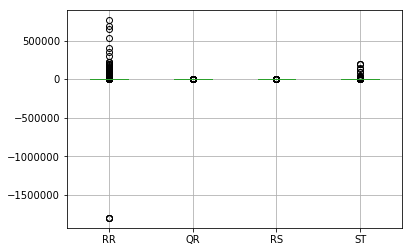

In [39]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

In [40]:
no_dups[no_dups.RR<0]

,RR,QR,RS,ST,T,died,filename
24069,-1799817,0,0,0,0.004832,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
21190,-1799790,0,0,0,-0.000402,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
19111,-1799789,0,0,0,0.001472,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19889,-1799721,0,0,0,-0.001497,False,./signals/not_died/p028869-2148-08-31-11-27_di...


In [41]:
no_dups[no_dups.RR<0].filename.values

array(['./signals/died/p004331-2142-11-02-12-06_dist_vector.npz.npy',
       './signals/died/p026575-2161-09-02-13-19_dist_vector.npz.npy',
       './signals/not_died/p013212-2192-11-06-17-30_dist_vector.npz.npy',
       './signals/not_died/p028869-2148-08-31-11-27_dist_vector.npz.npy'],
      dtype=object)

In [42]:
no_dups[no_dups.filename=='./signals/died/p004331-2142-11-02-12-06_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
23787,51,5,6,32,-0.178496,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23788,38,4,6,26,0.038180,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23813,46,5,5,33,-0.100362,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23815,66,5,6,31,0.027964,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23848,52,4,5,33,-0.174789,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23906,48,10,5,5,0.117373,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23910,79,4,6,24,-0.038428,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23914,42,4,6,26,0.045844,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
23936,80,5,5,24,-0.039242,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24069,-1799817,0,0,0,0.004832,True,./signals/died/p004331-2142-11-02-12-06_dist_v...


In [43]:
no_dups[no_dups.filename=='./signals/died/p026575-2161-09-02-13-19_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
2475,95,6,12,21,0.033008,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
2504,74,6,10,29,0.018789,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
8288,81,4,7,11,-0.061974,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
10770,68,5,7,36,-0.114831,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
10771,48,5,8,10,0.135975,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
12002,84,6,6,10,-0.069358,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
17383,94,4,7,11,-0.056159,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
17407,123,6,7,35,0.038576,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
19778,66,4,7,10,-0.056024,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21190,-1799790,0,0,0,-0.000402,True,./signals/died/p026575-2161-09-02-13-19_dist_v...


In [44]:
no_dups[no_dups.filename=='./signals/not_died/p013212-2192-11-06-17-30_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
15902,66,10,12,10,-0.425413,False,./signals/not_died/p013212-2192-11-06-17-30_di...
15991,67,11,11,10,-0.419810,False,./signals/not_died/p013212-2192-11-06-17-30_di...
15993,52,8,9,16,0.131547,False,./signals/not_died/p013212-2192-11-06-17-30_di...
16409,176,6,7,26,-0.163585,False,./signals/not_died/p013212-2192-11-06-17-30_di...
16452,32,6,9,25,-1.757356,False,./signals/not_died/p013212-2192-11-06-17-30_di...
16454,234,6,8,15,0.134772,False,./signals/not_died/p013212-2192-11-06-17-30_di...
18679,56,6,9,24,-0.261039,False,./signals/not_died/p013212-2192-11-06-17-30_di...
18849,66,11,12,10,-0.364404,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19042,67,7,8,14,0.286178,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19111,-1799789,0,0,0,0.001472,False,./signals/not_died/p013212-2192-11-06-17-30_di...


In [45]:
no_dups[no_dups.filename=='./signals/not_died/p028869-2148-08-31-11-27_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
19059,139,4,5,38,0.088850,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19090,70,5,12,24,0.093449,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19114,49,5,5,40,0.132781,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19258,199,5,5,38,0.088504,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19374,166,5,6,38,0.067884,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19441,138,4,6,37,0.090923,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19552,61,4,5,39,0.097891,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19750,36,6,11,27,-0.290792,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19888,67,5,13,22,0.079941,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19889,-1799721,0,0,0,-0.001497,False,./signals/not_died/p028869-2148-08-31-11-27_di...


In [46]:
# Quitar RR negativos
no_dups=no_dups[no_dups.RR>0]

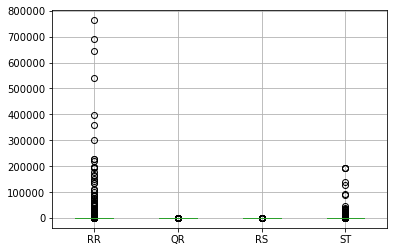

In [47]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

### Hay RR que son muy altos, puede deberse a que el segmento de señal analizado no detecta latidos y salta, por lo tanto se deben ignorar para el análisis, suponiendo que el mínimo HR es 40 bpm, los pícos R deberían estar como máximo separados por 1.5 segundos  60s / (40 b/min), por lo tanto quitamos para el análisis de cluster los elementos que tengan más de 1.5* fs(125)  de distancia entre picos (189)

In [48]:
no_dups=no_dups[no_dups.RR<189]

In [49]:
len(no_dups)

150987

In [50]:
no_dups.groupby('died').count()['RR']

died
False    71381
True     79606
Name: RR, dtype: int64

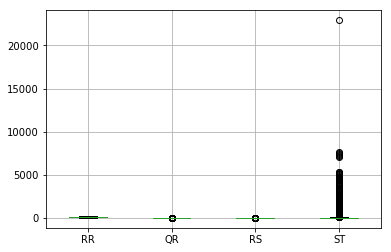

In [51]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

### Persisten problemas con la calidad de los ST, esto se puede deber a que el pico T no esta siendo debidamente identificado dentro del complejo y esta siendo detectado en picos de más adelante, sucede en aprox 700 latidos. Se descartan estos latidos para continuar el análisis.

In [52]:
no_dups.ST.describe()

count    150987.000000
mean         27.933663
std         108.136160
min           4.000000
25%          12.000000
50%          22.000000
75%          34.000000
max       22917.000000
Name: ST, dtype: float64

In [53]:
np.sum(no_dups.ST>189)

657

In [54]:
no_dups=no_dups[no_dups.ST<189]

In [55]:
len(no_dups)

150326

In [56]:
no_dups.groupby('died').count()['ST']

died
False    70825
True     79501
Name: ST, dtype: int64

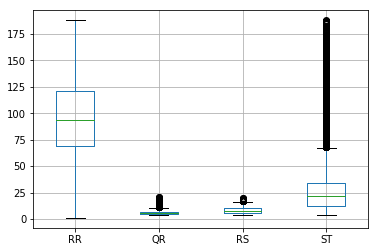

In [57]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

## Comparamos individualmente las variables independientes frente a la variable objetivo

In [39]:
from scipy.stats import ttest_ind

## RR

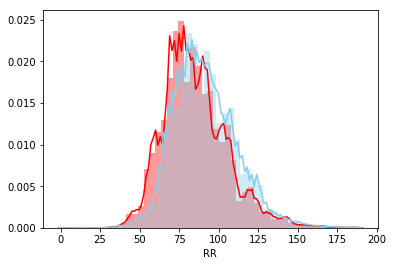

In [40]:
sns.distplot(no_dups[no_dups['died']==True].RR, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].RR, color='skyblue', label='not died')

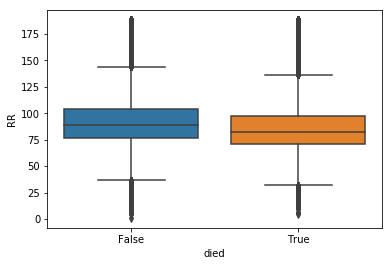

In [41]:
sns.boxplot(data=no_dups,y='RR', x='died')

In [42]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].RR,no_dups[no_dups['died']==False].RR, equal_var=False)

Ttest_indResult(statistic=-520.6094340190182, pvalue=0.0)

## QR

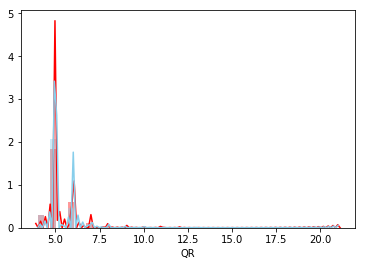

In [43]:
sns.distplot(no_dups[no_dups['died']==True].QR, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].QR, color='skyblue', label='not died')

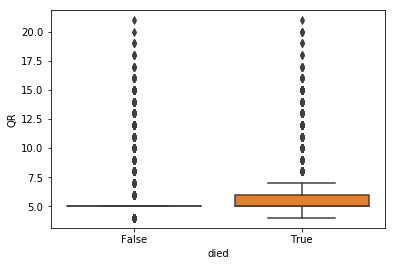

In [44]:
sns.boxplot(data=no_dups,y='QR', x='died')

In [45]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].QR,no_dups[no_dups['died']==False].QR, equal_var=False)

Ttest_indResult(statistic=247.76958054555837, pvalue=0.0)

## RS

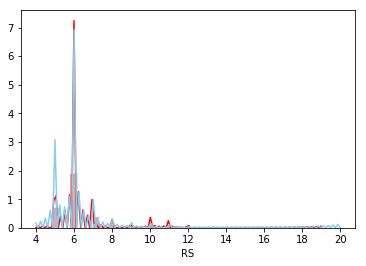

In [46]:
sns.distplot(no_dups[no_dups['died']==True].RS, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].RS, color='skyblue', label='not died')

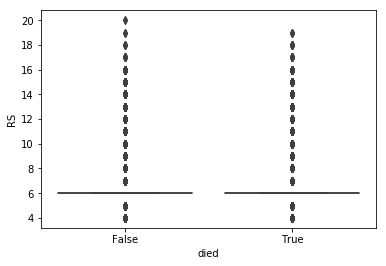

In [47]:
sns.boxplot(data=no_dups,y='RS', x='died')

In [48]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].RS,no_dups[no_dups['died']==False].RS, equal_var=False)

Ttest_indResult(statistic=327.33035729042683, pvalue=0.0)

## ST

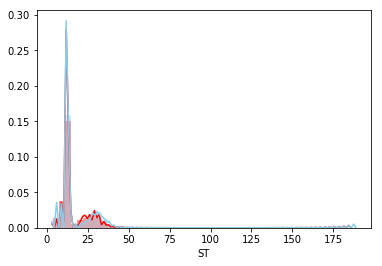

In [49]:
sns.distplot(no_dups[no_dups['died']==True].ST, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].ST, color='skyblue', label='not died')

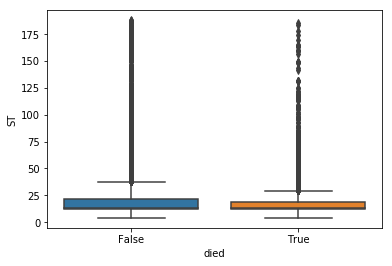

In [50]:
sns.boxplot(data=no_dups,y='ST', x='died')

In [51]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].ST,no_dups[no_dups['died']==False].ST, equal_var=False)

Ttest_indResult(statistic=-190.7656551922509, pvalue=0.0)

## T

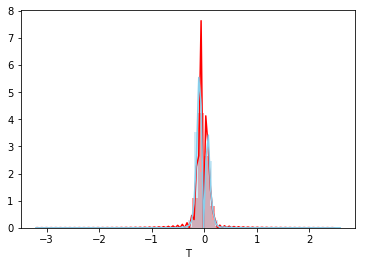

In [52]:
sns.distplot(no_dups[no_dups['died']==True]['T'], color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False]['T'], color='skyblue', label='not died')

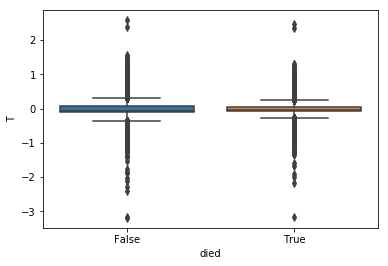

In [53]:
sns.boxplot(data=no_dups,y='T', x='died')

In [54]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True]['T'],no_dups[no_dups['died']==False]['T'], equal_var=False)

Ttest_indResult(statistic=221.96682083757784, pvalue=0.0)

In [55]:
no_dups.shape

(14315045, 7)

### Quitamos T ya que no parece tener diferencia para el fenómeno

In [64]:
no_dups=no_dups.drop_duplicates(subset=['RR','QR', 'RS','ST'])

In [65]:
no_dups.describe()

,RR,QR,RS,ST,T
count,150326.000000,150326.000000,150326.000000,150326.000000,150326.000000
mean,96.350551,6.487966,7.954246,24.427285,0.002675
std,35.472557,1.975054,2.457947,15.320705,0.156688
min,1.000000,4.000000,4.000000,4.000000,-3.164627
25%,69.000000,5.000000,6.000000,12.000000,-0.075685
50%,94.000000,6.000000,8.000000,22.000000,0.031646
75%,121.000000,7.000000,10.000000,34.000000,0.085849
max,188.000000,21.000000,20.000000,188.000000,2.347806


In [66]:
no_dups.shape

(150326, 7)

## Aplicamos estadarización de features

In [67]:
scaler= preprocessing.RobustScaler().fit(no_dups[['RR','QR', 'RS','ST']])

In [68]:
X=scaler.transform(no_dups[['RR','QR', 'RS','ST']])

In [69]:
X

array([[ 0.26923077,  0.5       ,  0.75      , -0.59090909],
       [ 0.25      ,  0.5       ,  0.75      , -0.54545455],
       [ 0.25      ,  0.5       ,  0.75      , -0.59090909],
       ...,
       [-1.23076923, -0.5       , -0.25      ,  0.18181818],
       [-0.17307692, -1.        , -1.        ,  0.45454545],
       [-0.63461538, -0.5       ,  0.75      , -0.04545455]])

In [70]:
pd.DataFrame(X, columns=['RR','QR', 'RS','ST']).describe()

,RR,QR,RS,ST
count,150326.000000,150326.000000,150326.000000,150326.000000
mean,0.045203,0.243983,-0.011438,0.110331
std,0.682165,0.987527,0.614487,0.696396
min,-1.788462,-1.000000,-1.000000,-0.818182
25%,-0.480769,-0.500000,-0.500000,-0.454545
50%,0.000000,0.000000,0.000000,0.000000
75%,0.519231,0.500000,0.500000,0.545455
max,1.807692,7.500000,3.000000,7.545455


In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA()
x_new = pca.fit_transform(X)

In [73]:
help(pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of co

In [74]:
print( pca.components_ )

[[-0.17342544  0.93065063  0.1873386  -0.26213979]
 [ 0.67471879  0.32491149 -0.06688137  0.65932842]
 [-0.70708714  0.10441521 -0.27127657  0.64461947]
 [-0.12126805 -0.13198255  0.94172191  0.28466561]]


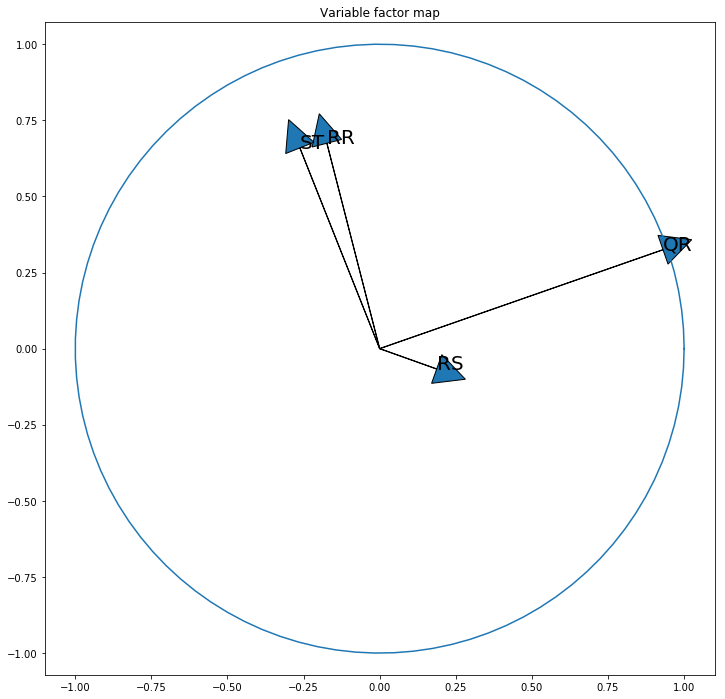

In [75]:
(fig, ax) = plt.subplots(figsize=(12, 12))
cols=['RR','QR', 'RS','ST']
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] ,
         pca.components_[1, i] ,
         cols[i], fontsize=20)

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [76]:
print(pca.explained_variance_ratio_)

[0.45715859 0.21735921 0.17426185 0.15122036]


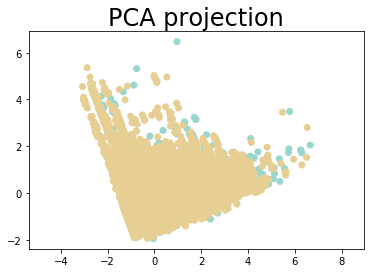

In [77]:
plt.scatter(x_new[:, 0], x_new[:, 1], c=[sns.color_palette("BrBG", 2)[x] for x in no_dups['died']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection', fontsize=24);

## Prueba con MiniBatchKMeans, el mejor resultado obtenido son 5-6 clusters

In [79]:
from sklearn.cluster import MiniBatchKMeans,KMeans

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.externals.joblib import Parallel, delayed


In [112]:
space_mini_knn= [Integer(2, 16, name='n_clusters'), Real(0.01, 0.4, name='reassignment_ratio')]

In [113]:
models=[]

In [116]:
@use_named_args(space_mini_knn)
def objective(**params):
    print(params)
    kmeans = MiniBatchKMeans(init='k-means++', n_clusters=params['n_clusters'], reassignment_ratio=params['reassignment_ratio'])
    kmeans.fit(X)
    labels=kmeans.labels_
    a,counts=np.unique(labels, return_counts=True)
    models.append(labels)
    sil = metrics.silhouette_score(X,labels, sample_size=50000, random_state=1)
    print("labels: {} counts:{}  sil:{} ".format(a,counts,sil))
    return -sil


In [117]:
from skopt import gp_minimize
res_gp_knn = gp_minimize(objective, space_mini_knn, n_calls=15, random_state=0, verbose=True , n_jobs=2, n_random_starts =3)

Iteration No: 1 started. Evaluating function at random point.
{'n_clusters': 10, 'reassignment_ratio': 0.33926364194659686}
labels: [0 1 2 3 4 5 6 7 8 9] counts:[13536 19240 16105 13101 13245 17271  9703 20651 14824 12650]  sil:0.18377039529895725 
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 22.4931
Function value obtained: -0.1838
Current minimum: -0.1838
Iteration No: 2 started. Evaluating function at random point.
{'n_clusters': 14, 'reassignment_ratio': 0.340428178125809}
labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] counts:[11898  9729 13243 12562  9551 12844 12817 12354  6884 12680 10480 10681
 13710   893]  sil:0.19252162909694023 
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 22.2605
Function value obtained: -0.1925
Current minimum: -0.1925
Iteration No: 3 started. Evaluating function at random point.
{'n_clusters': 11, 'reassignment_ratio': 0.15990886584415298}
labels: [ 0  1  2  3  4  5  6  7  8  9 10] counts:[10477 16656 11

C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


labels: [0 1] counts:[ 41094 109232]  sil:0.3017142839452656 
Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 24.8147
Function value obtained: -0.3017
Current minimum: -0.3265
Iteration No: 8 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.01}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


labels: [0 1] counts:[95196 55130]  sil:0.26836990535457345 
Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 24.9962
Function value obtained: -0.2684
Current minimum: -0.3265
Iteration No: 9 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.01}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


labels: [0 1] counts:[ 47203 103123]  sil:0.28441814798161735 
Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 24.8386
Function value obtained: -0.2844
Current minimum: -0.3265
Iteration No: 10 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.3998100766754854}
labels: [0 1] counts:[115629  34697]  sil:0.32445842093455296 
Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 24.7478
Function value obtained: -0.3245
Current minimum: -0.3265
Iteration No: 11 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.4}
labels: [0 1] counts:[78618 71708]  sil:0.24185976002300516 
Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 23.8891
Function value obtained: -0.2419
Current minimum: -0.3265
Iteration No: 12 started. Searching for the next optimal point.
{'n_clusters': 16, 'reassignment_ratio': 0.010423938659117197}
labels: [ 0  1  

C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


labels: [0 1] counts:[ 50257 100069]  sil:0.2779909040086611 
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 25.3024
Function value obtained: -0.2780
Current minimum: -0.3265


In [118]:
print("""Best parameters:
- n_clusters=%d
- reassignment_ratio=%.6f

""" % (res_gp_knn.x[0], res_gp_knn.x[1]))

Best parameters:
- n_clusters=2
- reassignment_ratio=0.010000




In [78]:
models[7]

array([0, 0, 0, ..., 2, 3, 2])

In [90]:
models=[]

In [193]:
space_knn= [Integer(2, 16, name='n_clusters')]

In [194]:
@use_named_args(space_knn)
def objective_kmeans(**params):
    print(params)
    kmeans = KMeans(init='k-means++', n_clusters=params['n_clusters'],precompute_distances=True,max_iter=1000)
    kmeans.fit(X)
    labels=kmeans.labels_
    models.append(labels)
    sil = metrics.silhouette_score(X,labels, sample_size=50000, random_state=1)
    return -sil

In [195]:
from skopt import gp_minimize
res_gp_knn = gp_minimize(objective_kmeans, space_knn, n_calls=15, random_state=0, verbose=True , n_jobs=1, n_random_starts =3)

Iteration No: 1 started. Evaluating function at random point.
{'n_clusters': 10}
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 34.6893
Function value obtained: -0.2301
Current minimum: -0.2301
Iteration No: 2 started. Evaluating function at random point.
{'n_clusters': 14}
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 44.3080
Function value obtained: -0.2050
Current minimum: -0.2301
Iteration No: 3 started. Evaluating function at random point.
{'n_clusters': 14}
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 40.5512
Function value obtained: -0.2051
Current minimum: -0.2301
Iteration No: 4 started. Searching for the next optimal point.
{'n_clusters': 2}
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 25.2534
Function value obtained: -0.2242
Current minimum: -0.2301
Iteration No: 5 started. Searching for the next optimal point.
{'n_clusters': 6}
Iteration No: 5 ended. Search finished for the n

C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 25.1114
Function value obtained: -0.2240
Current minimum: -0.2317
Iteration No: 8 started. Searching for the next optimal point.
{'n_clusters': 6}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 27.1075
Function value obtained: -0.2318
Current minimum: -0.2318
Iteration No: 9 started. Searching for the next optimal point.
{'n_clusters': 7}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 29.1421
Function value obtained: -0.2212
Current minimum: -0.2318
Iteration No: 10 started. Searching for the next optimal point.
{'n_clusters': 2}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 24.9084
Function value obtained: -0.2242
Current minimum: -0.2318
Iteration No: 11 started. Searching for the next optimal point.
{'n_clusters': 4}
Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 26.1506
Function value obtained: -0.2466
Current minimum: -0.2466
Iteration No: 12 started. Searching for the next optimal point.
{'n_clusters': 2}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 26.0005
Function value obtained: -0.2241
Current minimum: -0.2466
Iteration No: 13 started. Searching for the next optimal point.
{'n_clusters': 4}


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 27.1724
Function value obtained: -0.2466
Current minimum: -0.2466
Iteration No: 14 started. Searching for the next optimal point.
{'n_clusters': 5}
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 27.2970
Function value obtained: -0.2538
Current minimum: -0.2538
Iteration No: 15 started. Searching for the next optimal point.
{'n_clusters': 16}
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 55.2264
Function value obtained: -0.2028
Current minimum: -0.2538


In [94]:
print("""Best parameters:
- n_clusters=%d


""" % (res_gp_knn.x[0]))

Best parameters:
- n_clusters=4





In [96]:
models[10]

array([3, 3, 3, ..., 2, 2, 3])

In [97]:
no_dups['label_knn']=models[10]

In [98]:
no_dups['label_knn'].value_counts()

2    45339
3    43351
1    37599
0    24037
Name: label_knn, dtype: int64

In [ ]:
no_dups['died'].value_counts()

### DBSCAN

In [82]:
space_dbscan  = [Integer(2, 1000, name='min_samples'),
          Real(10**-6, 10**0, "log-uniform", name='eps')]

In [83]:
def scoring(num_labels,silhouette_sc):
    sil_sc=-silhouette_sc
    #sc_labels=np.abs(num_labels-16)
    sc_labels=0
    return sil_sc+sc_labels

In [84]:
models=[]

In [85]:
db= DBSCAN(n_jobs=2)

In [86]:
@use_named_args(space_dbscan)
def objective(**params):
    print(params)
    db.set_params(**params)
    db.fit(X)
    labels=db.labels_
    a,counts=np.unique(labels, return_counts=True)
    models.append(labels)
    
    if len(a)<=8 :
        print("No enough labels, are:"+str(a))
        return 100000
    sil = metrics.silhouette_score(X,labels, sample_size=30000, random_state=1)
    print("labels: {} counts:{}  sil:{} ".format(a,counts,sil))
    
    return scoring(len(a),sil)


In [87]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space_dbscan, n_calls=30, random_state=0,verbose=True, x0=[[2,0.94]])


Iteration No: 1 started. Evaluating function at provided point.
{'min_samples': 2, 'eps': 0.94}
No enough labels, are:[-1  0  1  2  3  4]
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 1335.6046
Function value obtained: 100000.0000
Current minimum: 100000.0000
Iteration No: 2 started. Evaluating function at random point.
{'min_samples': 594, 'eps': 0.11630395714480335}
No enough labels, are:[-1]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.3068
Function value obtained: 100000.0000
Current minimum: 100000.0000
Iteration No: 3 started. Evaluating function at random point.
{'min_samples': 858, 'eps': 0.12120218038438149}
No enough labels, are:[-1]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.6073
Function value obtained: 100000.0000
Current minimum: 100000.0000
Iteration No: 4 started. Evaluating function at random point.
{'min_samples': 624, 'eps': 0.0002024371636420898}
No enough labels, are:[-1]
Iteration No: 4 en

C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'min_samples': 13, 'eps': 1.1226295458105512e-06}
No enough labels, are:[-1]
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 2.8610
Function value obtained: 100000.0000
Current minimum: 100000.0000
Iteration No: 23 started. Searching for the next optimal point.
{'min_samples': 995, 'eps': 0.9592027326402527}
No enough labels, are:[-1  0]
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 289.6881
Function value obtained: 100000.0000
Current minimum: 100000.0000
Iteration No: 24 started. Searching for the next optimal point.
{'min_samples': 11, 'eps': 0.8760315895801223}
No enough labels, are:[-1  0]
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 280.0132
Function value obtained: 100000.0000
Current minimum: 100000.0000
Iteration No: 25 started. Searching for the next optimal point.
{'min_samples': 980, 'eps': 1.2389182130291024e-06}
No enough labels, are:[-1]
Iteration No: 25 ended. Search fi

In [94]:
db.set_params(min_samples=2,eps=0.9346576287462293)
db.fit(X)
 

DBSCAN(algorithm='auto', eps=0.9346576287462293, leaf_size=30,
    metric='euclidean', metric_params=None, min_samples=2, n_jobs=2,
    p=None)

In [95]:
labels=db.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([    40, 150255,      3,      2,      3,      7,      6,      6,
             2,      2], dtype=int64))

### HDBSCAN

In [88]:
import hdbscan

In [115]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, gen_min_span_tree=True)
clusterer.fit(X)

C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=250, min_samples=None, p=None,
    prediction_data=False)

In [116]:
matplotlib.rc('figure', figsize=[20,20])

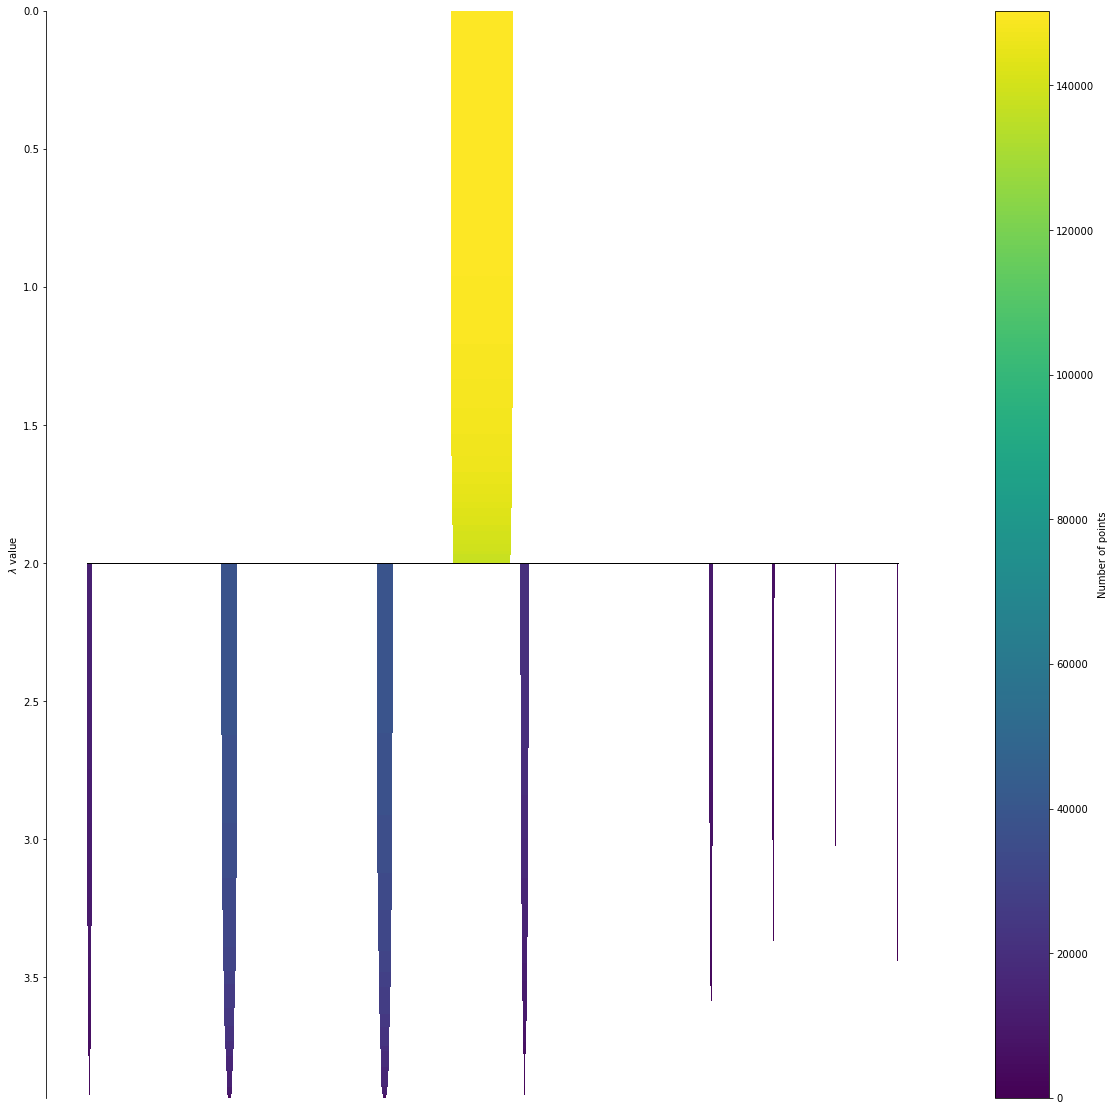

In [117]:
clusterer.condensed_tree_.plot()

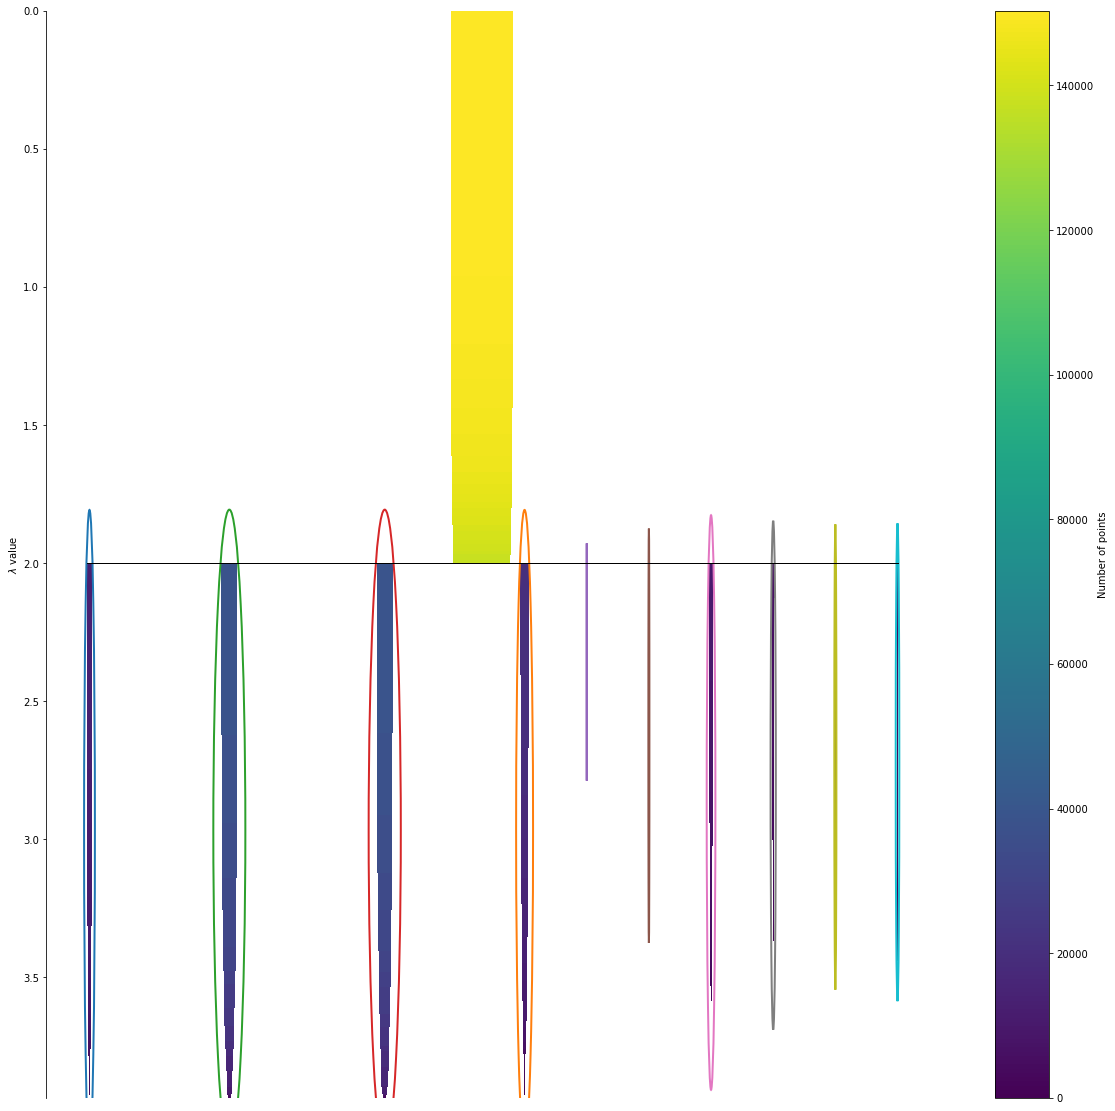

In [118]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [119]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([13638, 13087, 20492, 38736, 38884,   452,  1237, 10528,  6362,
         2548,  4362], dtype=int64))

In [112]:
len(clusterer.probabilities_)

150326

In [121]:
no_dups['labels']=clusterer.labels_

In [122]:
no_dups

,RR,QR,RS,ST,T,died,filename,labels
0,108,7,11,9,0.187698,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1
1,107,7,11,10,0.201723,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1
3,107,7,11,9,0.198247,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1
4,106,6,8,11,0.138021,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,3
5,109,7,11,9,0.186296,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1
7,117,9,10,13,-0.123057,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,7
8,96,6,7,11,0.096489,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,3
9,119,9,10,13,-0.114533,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,7
10,107,8,10,12,-0.123564,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,6
11,98,7,11,9,0.191732,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,10)

In [124]:
X_sample=no_dups[['RR','QR', 'RS','ST','labels']].sample(5000)

In [128]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=10,n_iter=5000).fit_transform(X_sample[['RR','QR', 'RS','ST']])


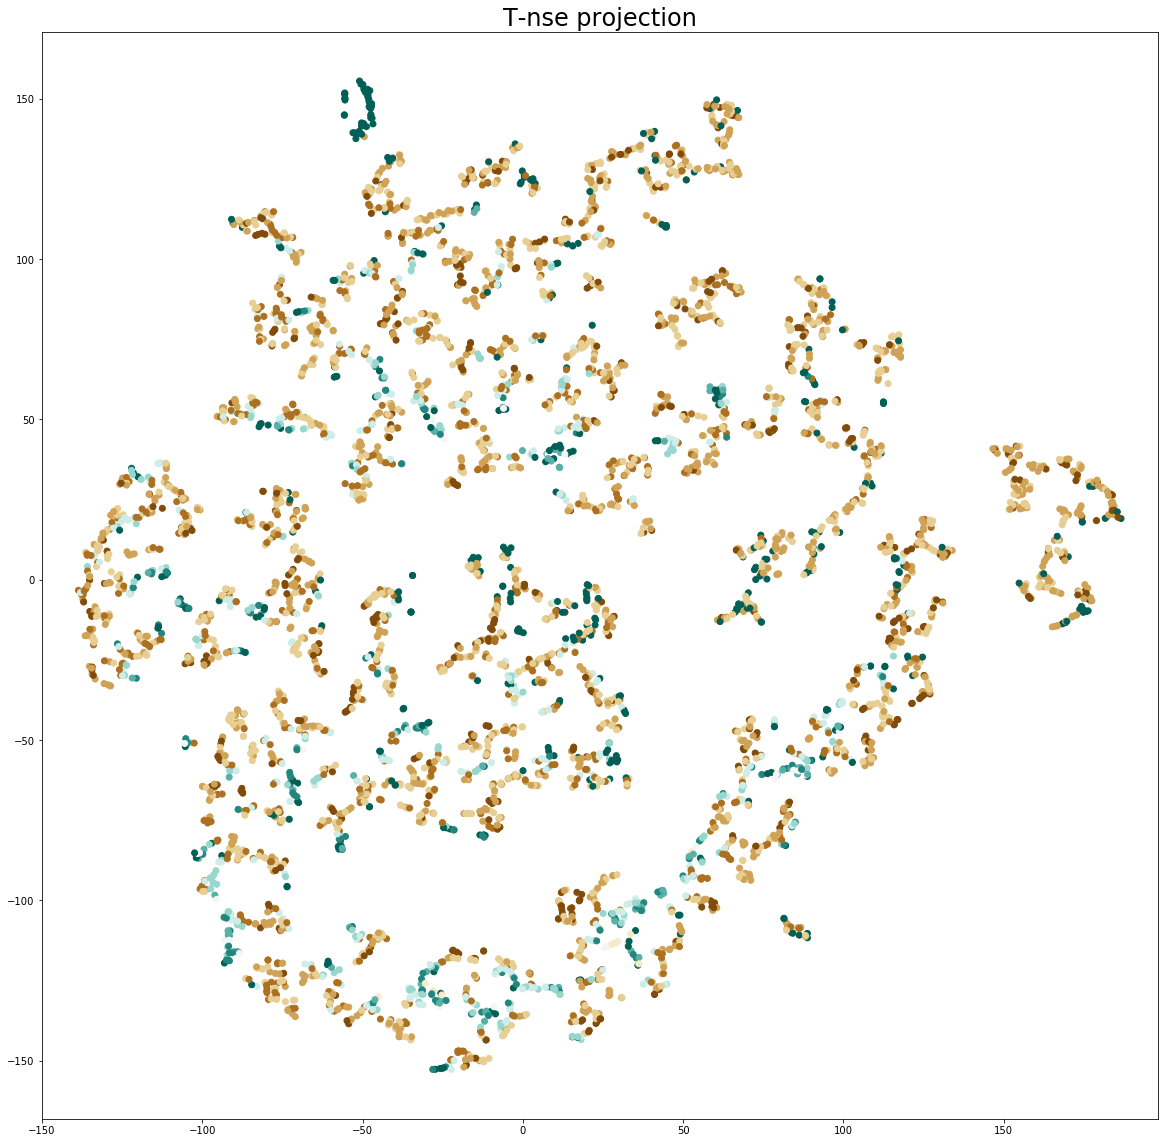

In [129]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=[sns.color_palette("BrBG",  X_sample['labels'].nunique())[x] for x in X_sample['labels']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-nse projection', fontsize=24);

### convert files to Strings

In [132]:
result=result.merge(no_dups[['RR','QR','RS','ST','labels']], how='left')

In [133]:
result.head(20)

,RR,QR,RS,ST,T,died,filename,labels
0,108,7,11,9,0.187698,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1.0
1,107,7,11,10,0.201723,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1.0
2,108,7,11,9,0.179334,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1.0
3,107,7,11,9,0.198247,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1.0
4,106,6,8,11,0.138021,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,3.0
5,109,7,11,9,0.186296,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1.0
6,107,7,11,10,0.192764,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1.0
7,117,9,10,13,-0.123057,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,7.0
8,96,6,7,11,0.096489,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,3.0
9,119,9,10,13,-0.114533,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,7.0


In [135]:
result['labels'].fillna(-1, inplace=True)

In [137]:
result['labels']=result['labels'].astype(int)

In [140]:
result['lab']=result.labels.map(lambda x: chr(97+x) if x!=-1 else ' ')

In [141]:
result.head(20)

,RR,QR,RS,ST,T,died,filename,labels,lab
0,108,7,11,9,0.187698,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1,b
1,107,7,11,10,0.201723,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1,b
2,108,7,11,9,0.179334,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1,b
3,107,7,11,9,0.198247,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1,b
4,106,6,8,11,0.138021,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,3,d
5,109,7,11,9,0.186296,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1,b
6,107,7,11,10,0.192764,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,1,b
7,117,9,10,13,-0.123057,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,7,h
8,96,6,7,11,0.096489,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,3,d
9,119,9,10,13,-0.114533,True,./signals/died/p000491-2170-04-03-14-08_dist_v...,7,h


In [142]:
results_agg=result.groupby('filename').agg({'lab':lambda x: x.sum()}).reset_index()

In [153]:
results_agg=results_agg.merge(result[['filename','died']].drop_duplicates(), on='filename' )

In [154]:
from nltk.tokenize import RegexpTokenizer

In [155]:
from nltk.util import ngrams

In [156]:
from collections import Counter

In [157]:
tokenizer = RegexpTokenizer('\S')

In [186]:
def tk(text):
    tokenizer = RegexpTokenizer('\S')
    return tokenizer.tokenize(text)

In [158]:
phrase_counter = Counter()
for l in results_agg.lab:
    tokens=tokenizer.tokenize(l)
    for phrase in ngrams(tokens, 2):
        phrase_counter[phrase] += 1
    for phrase in ngrams(tokens, 3):
        phrase_counter[phrase] += 1
    for phrase in ngrams(tokens, 4):
        phrase_counter[phrase] += 1
    for phrase in ngrams(tokens, 5):
        phrase_counter[phrase] += 1    

In [173]:
vocabulary=list(map( lambda x : ''.join(x[0]) ,phrase_counter.most_common(3000)))

In [174]:
len(vocabulary)

3000

In [172]:
results_agg.shape

(1374, 3)

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
tfidf = TfidfVectorizer(stop_words=[], tokenizer=tk, vocabulary=vocabulary)

In [190]:
transformed=tfidf.fit_transform(results_agg.lab)

In [192]:
dense=transformed.todense()